# Business Case: Walmart - Confidence Interval and CLT 

## About Walmart:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


## Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

### Dataset

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

## Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [1]:
#Import the libraries:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the Walmart data:

df = pd.read_csv("Walmart_data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Total 550068 rows and 10 columns.


## Looking at unique values of all columns -

In [5]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


From the above observation, we can conclude that only Purchase can be considered as Continuous, the rest of the columns should be considered as categories.

In [6]:
#changing object dtype to category  to save memory
df.User_ID=df["User_ID"].astype("category")
df.Product_ID=df["Product_ID"].astype("category")
df.Gender=df["Gender"].astype("category")
df.Age=df["Age"].astype("category")
df.Occupation=df["Occupation"].astype("category")
df.City_Category=df["City_Category"].astype("category")
df.Stay_In_Current_City_Years=df["Stay_In_Current_City_Years"].astype("category")
df.Marital_Status=df["Marital_Status"].astype("category")
df.Product_Category=df["Product_Category"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [7]:
# Number of unique values in each column
for i in df.columns:
  print(i, ':', df[i].nunique())

User_ID : 5891
Product_ID : 3631
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category : 20
Purchase : 18105


In [8]:
for col in df.columns:
  print(col, df[col].unique())

User_ID [1000001, 1000002, 1000003, 1000004, 1000005, ..., 1004588, 1004871, 1004113, 1005391, 1001529]
Length: 5891
Categories (5891, int64): [1000001, 1000002, 1000003, 1000004, ..., 1006037, 1006038, 1006039, 1006040]
Product_ID ['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
Gender ['F', 'M']
Categories (2, object): ['F', 'M']
Age ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
Occupation [10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20]
City_Category ['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']
Stay_In_Current_City_Years ['2', '4+', '3', '1', '0']
Categori

In [9]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


- There are 3631 unique product IDs in the dataset. P00265242 is the most sold Product ID.
- Total 550068 rows,  414259 Male and rest are female.
- There are 7 unique age groups and most of the purchase belongs to age 26-35 group.
- There are 3 unique citi categories with category B being the highest.
- 5 unique values for Stay_in_current_citi_years with 1 being the highest.
- 21 distinct occupations with 4 being highest.
- 20 unique product categories with 20 being highest.
- For purchase variable, the mean and median differ indicating outliers.
- Purchase min in 12 and max in 23k showing a range of values Mean is 9.2k and 75% values are less than 12k.



## Missing value detection

In [10]:
# detecting nulls
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

No null values!

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

## Non-Graphical Analysis: Value counts

In [13]:
cols=['Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']
for col in cols:
  print(col)
  print(df[col].value_counts(normalize=True))
  print('\n')

Gender
M    0.753105
F    0.246895
Name: Gender, dtype: float64


Age
26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64


City_Category
B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64


Stay_In_Current_City_Years
1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64


Marital_Status
0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64




- 40% of the purchase done by aged 26-35.
- 75% of the purchase is done by males.
- 60% single and 40% customers are married.
- 35% customers staying in city from 1 year.
- 42% customers belong to city category B.


In [14]:
#checking how data is spread based on Distinct Users

cols=['Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status']
for col in cols:
  print(df.groupby([col])['User_ID'].nunique())
  print('\n')

Gender
F    1666
M    4225
Name: User_ID, dtype: int64


Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64


City_Category
A    1045
B    1707
C    3139
Name: User_ID, dtype: int64


Stay_In_Current_City_Years
0      772
1     2086
2     1145
3      979
4+     909
Name: User_ID, dtype: int64


Marital_Status
0    3417
1    2474
Name: User_ID, dtype: int64




- Only 4225 distinct male customers and 1666 females.

## Visual Analysis 
Detecting outliers for purchase amount

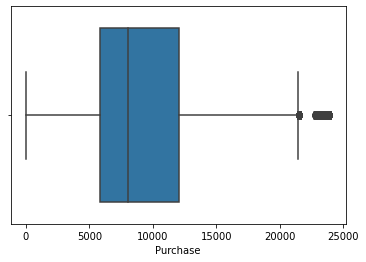

In [15]:
ax = sns.boxplot(x=df["Purchase"])
plt.show()

Clearly there are outliers in purchase column as also observed from the describe() above.

Univariate analysis

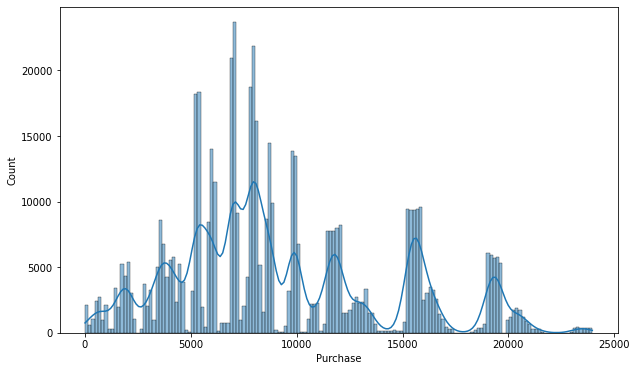

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Purchase", kde=True)
plt.show()

- Purchase value between 5000 and 10000 have higher count.

Univariate analysis for qualitative variables:

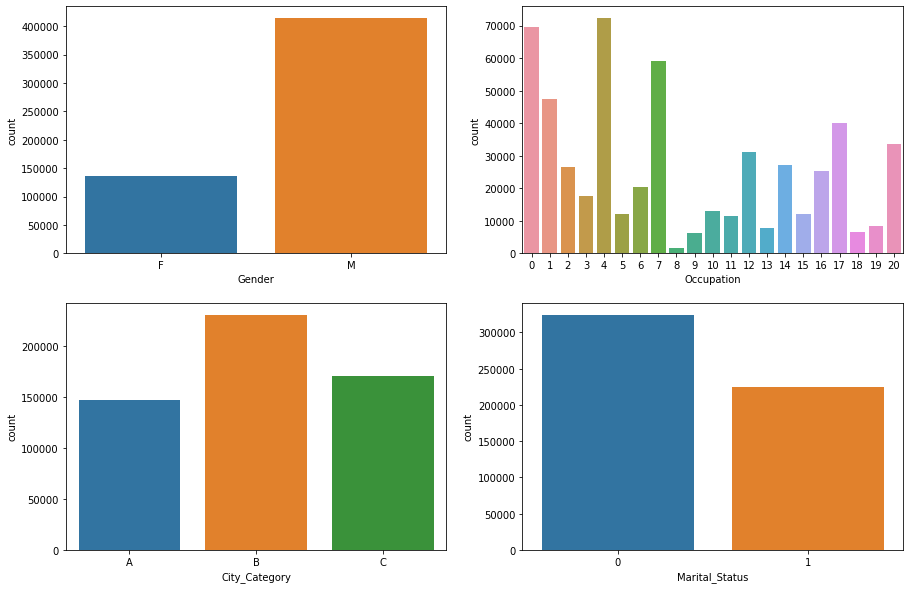

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(data=df, x='Gender', ax=axs[0,0])
sns.countplot(data=df, x='Occupation', ax=axs[0,1])
sns.countplot(data=df, x='City_Category', ax=axs[1,0])
sns.countplot(data=df, x='Marital_Status', ax=axs[1,1])
plt.show()

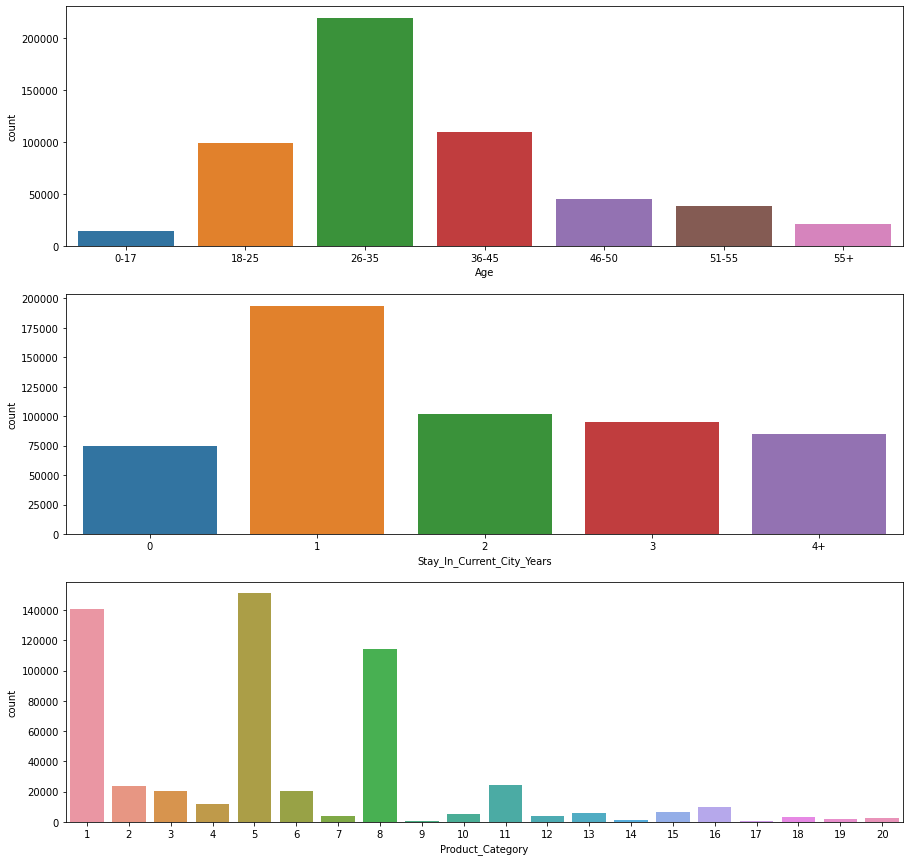

In [18]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
sns.countplot(data=df, x='Age', ax=axs[0])
sns.countplot(data=df, x='Stay_In_Current_City_Years', ax=axs[1])
sns.countplot(data=df, x='Product_Category', ax=axs[2])
plt.show()

- Purchases done by males are much higher than females.
- Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.
- Purchases are highest from City category B.
- Single customer purchases are higher than married users.
- 26-31 age group purchase more.
- Most customers stay in curent city for 1 year.
- Category 1,5,8 are sold most.

For categorical variable(s): Boxplot

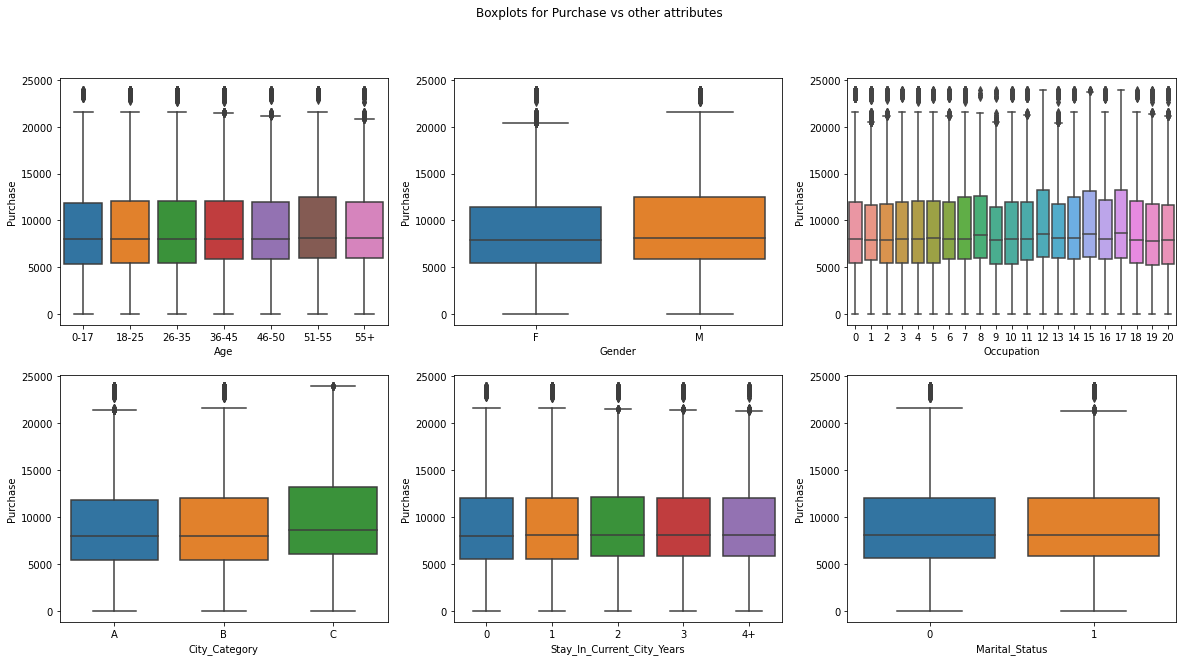

In [19]:
fig=plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.boxplot(x="Age", y="Purchase", data=df)

plt.subplot(2, 3, 2)
sns.boxplot(x="Gender", y="Purchase", data=df)

plt.subplot(2, 3, 3)
sns.boxplot(x="Occupation", y="Purchase", data=df)

plt.subplot(2, 3, 4)
sns.boxplot(x="City_Category", y="Purchase", data=df)

plt.subplot(2, 3, 5)
sns.boxplot(x="Stay_In_Current_City_Years", y="Purchase", data=df)

plt.subplot(2, 3, 6)
sns.boxplot(x="Marital_Status", y="Purchase", data=df)

fig.suptitle("Boxplots for Purchase vs other attributes")
plt.show()

- Most of the purchases lie between 5k to 12k across all groups.

# Answering questions
Are women spending more money per transaction than men? Why or Why not? 

Confidence intervals and distribution of the mean of the expenses by female and male customers 

Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? 

Results when the same activity is performed for Married vs Unmarried 

Results when the same activity is performed for Age

In [20]:
# Genderwise average purchases-

df_gender=df.groupby(['User_ID','Gender'])[['Purchase']].sum().reset_index()
df_gender=df_gender[df_gender['Purchase']!=0]
df_gender

,User_ID,Gender,Purchase
0,1000001,F,334093
3,1000002,M,810472
5,1000003,M,341635
7,1000004,M,206468
9,1000005,M,821001
...,...,...,...
11772,1006036,F,4116058
11774,1006037,F,1119538
11776,1006038,F,90034
11778,1006039,F,590319


In [21]:
df_gender['Gender'].value_counts()

M    4225
F    1666
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Avg. male purchase')

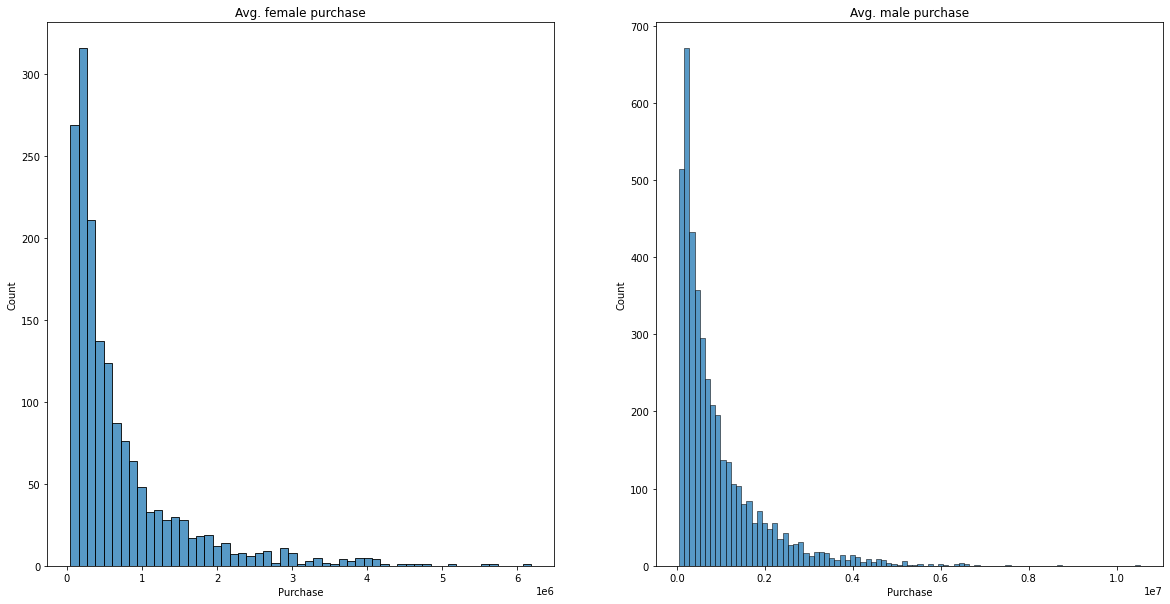

In [22]:
fig=plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.histplot(df_gender[df_gender['Gender']=='F']['Purchase'])
plt.title('Avg. female purchase')

plt.subplot(1, 2, 2)
sns.histplot(df_gender[df_gender['Gender']=='M']['Purchase'])
plt.title('Avg. male purchase')

- Males purchase more on an average than females.

In [23]:
df_gender.groupby(['Gender'])[['Purchase']].agg(['mean','sum'])

Purchase            
                 mean         sum
Gender                           
F       712024.394958  1186232642
M       925344.402367  3909580100

- Both average and total amount spent by males is higher than females.



## Bootstrapping means for purchase amount by Gender

In [24]:
males = df[df['Gender'] == 'M']
males.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215


In [25]:
females = df[df['Gender'] == 'F']
females.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


Consider sample size=1000

In [26]:
boot_means_m = []
boot_means_f = []

for i in range(1000):
    # compute the bootstrap sample,mean of the bootstrap sample
    mean_m=males.sample(1000,replace=True)['Purchase'].mean()
    mean_f=females.sample(1000,replace=True)['Purchase'].mean()

    # add it to our list of bootstrap means
    boot_means_m.append(mean_m)
    boot_means_f.append(mean_f)


Now let’s see the distribution of those bootstrap sample means, with a vertical line indicating the observed sample mean:

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


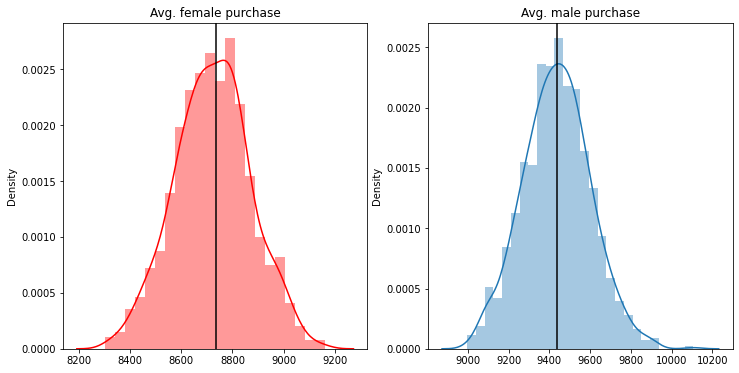

In [27]:
fig=plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(boot_means_f,kde=True,color='red')
plt.title('Avg. female purchase')
plt.axvline(np.mean(females['Purchase']), color='black')

plt.subplot(1, 2, 2)
sns.distplot(boot_means_m,kde=True)
plt.title('Avg. male purchase')
plt.axvline(np.mean(males['Purchase']), color='black')

- Sample means are closer to population means as per the Central Limit Theorem.

Let us find 95% CI using the above bootstrapped means -

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


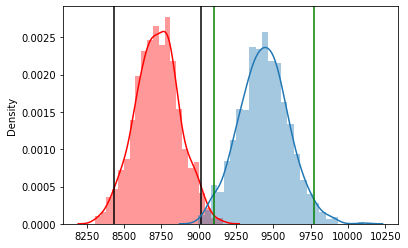

In [28]:
sns.distplot(boot_means_f,kde=True,color='red')
plt.axvline(np.quantile(boot_means_f, 0.025), color='black')
plt.axvline(np.quantile(boot_means_f, 0.975), color='black')
sns.distplot(boot_means_m,kde=True)
plt.axvline(np.quantile(boot_means_m, 0.025), color='green')
plt.axvline(np.quantile(boot_means_m, 0.975), color='green')
plt.show()

In [29]:
print("Average female purchase with 95% CI : ",np.quantile(boot_means_f, [0.025, 0.975]))
print("Average female purchase with 95% CI : ",np.quantile(boot_means_m, [0.025, 0.975]))

Average female purchase with 95% CI :  [8430.7979 9012.6241]
Average female purchase with 95% CI :  [9102.2499   9772.574275]


- 95% CI dont overlap so we can confidently say that male purchase amount is higher than female purchase amount.

Let us find 90% CI using the above bootstrapped means -

In [30]:
print("Average female purchase with 90% CI : ",np.quantile(boot_means_f, [0.050, 0.950]))
print("Average female purchase with 90% CI : ",np.quantile(boot_means_m, [0.050, 0.950]))

Average female purchase with 90% CI :  [8472.7459  8980.47495]
Average female purchase with 90% CI :  [9163.37265 9710.21585]


Let us repeat the above analysis with increased sample size-
n=10000

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


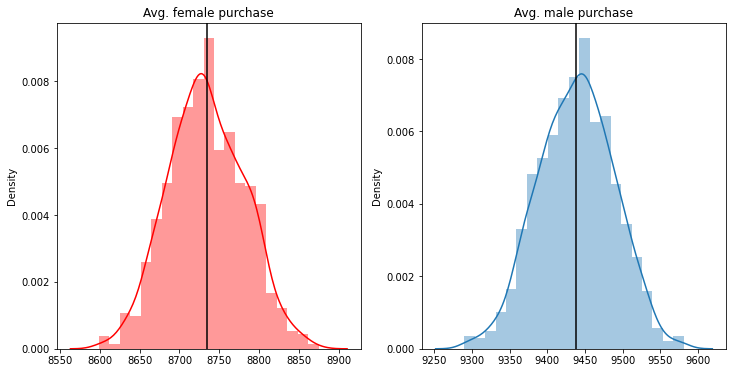

In [31]:
boot_means_m = []
boot_means_f = []

for i in range(1000):
    # compute the bootstrap sample,mean of the bootstrap sample
    mean_m=males.sample(10000,replace=True)['Purchase'].mean()
    mean_f=females.sample(10000,replace=True)['Purchase'].mean()

    # add it to our list of bootstrap means
    boot_means_m.append(mean_m)
    boot_means_f.append(mean_f)

fig=plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(boot_means_f,kde=True,color='red')
plt.title('Avg. female purchase')
plt.axvline(np.mean(females['Purchase']), color='black')

plt.subplot(1, 2, 2)
sns.distplot(boot_means_m,kde=True)
plt.title('Avg. male purchase')
plt.axvline(np.mean(males['Purchase']), color='black')


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


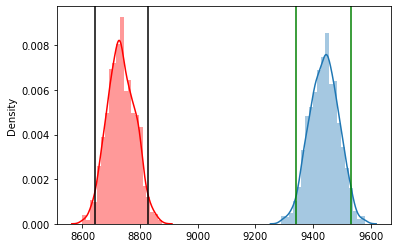

Average female purchase with 95% CI :  [8642.3464875 8827.436545 ]
Average male purchase with 95% CI :  [9341.49935   9531.6333075]


Average female purchase with 90% CI :  [8658.46345  8810.070845]
Average male purchase with 90% CI :  [9357.72674  9521.625345]


In [32]:
sns.distplot(boot_means_f,kde=True,color='red')
plt.axvline(np.quantile(boot_means_f, 0.025), color='black')
plt.axvline(np.quantile(boot_means_f, 0.975), color='black')
sns.distplot(boot_means_m,kde=True)
plt.axvline(np.quantile(boot_means_m, 0.025), color='green')
plt.axvline(np.quantile(boot_means_m, 0.975), color='green')
plt.show()

print("Average female purchase with 95% CI : ",np.quantile(boot_means_f, [0.025, 0.975]))
print("Average male purchase with 95% CI : ",np.quantile(boot_means_m, [0.025, 0.975]))
print('\n')
print("Average female purchase with 90% CI : ",np.quantile(boot_means_f, [0.050, 0.950]))
print("Average male purchase with 90% CI : ",np.quantile(boot_means_m, [0.050, 0.950]))

Increasing sample size reduces standard error. The sample mean is closer to population mean. It is clearly concluded that male spend  higher than females.

## Bootstrapping means for purchase amount by Marital Status

In [33]:
unmarried = df[df['Marital_Status'] == 0]
unmarried.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422


In [34]:
married = df[df['Marital_Status'] == 1]
married.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


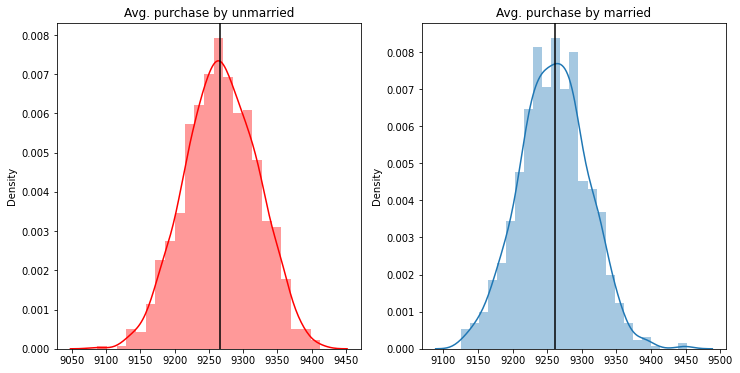

In [35]:
boot_means_unmarried = []
boot_means_married = []

for i in range(1000):
    # compute the bootstrap sample,mean of the bootstrap sample
    mean_unmarried=unmarried.sample(10000,replace=True)['Purchase'].mean()
    mean_married=married.sample(10000,replace=True)['Purchase'].mean()

    # add it to our list of bootstrap means
    boot_means_unmarried.append(mean_unmarried)
    boot_means_married.append(mean_married)

fig=plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(boot_means_unmarried,kde=True,color='red')
plt.title('Avg. purchase by unmarried')
plt.axvline(np.mean(unmarried['Purchase']), color='black')

plt.subplot(1, 2, 2)
sns.distplot(boot_means_married,kde=True)
plt.title('Avg. purchase by married')
plt.axvline(np.mean(married['Purchase']), color='black')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


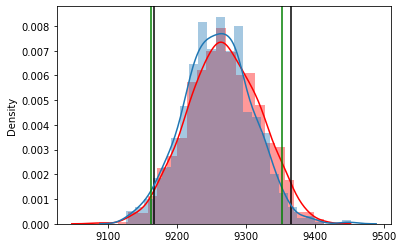

Average purchase of unmarried people with 95% CI :  [9166.7954475 9365.999935 ]
Average purchase of married people with 95% CI :  [9162.311025  9352.4430475]


Average purchase of unmarried people with 90% CI :  [9182.600125 9353.343005]
Average purchase of married people with 90% CI :  [9177.893035 9339.284505]


In [36]:
sns.distplot(boot_means_unmarried,kde=True,color='red')
plt.axvline(np.quantile(boot_means_unmarried, 0.025), color='black')
plt.axvline(np.quantile(boot_means_unmarried, 0.975), color='black')
sns.distplot(boot_means_married,kde=True)
plt.axvline(np.quantile(boot_means_married, 0.025), color='green')
plt.axvline(np.quantile(boot_means_married, 0.975), color='green')
plt.show()

print("Average purchase of unmarried people with 95% CI : ",np.quantile(boot_means_unmarried, [0.025, 0.975]))
print("Average purchase of married people with 95% CI : ",np.quantile(boot_means_married, [0.025, 0.975]))
print('\n')
print("Average purchase of unmarried people with 90% CI : ",np.quantile(boot_means_unmarried, [0.050, 0.950]))
print("Average purchase of married people with 90% CI : ",np.quantile(boot_means_married, [0.050, 0.950]))

Not much difference is seen between purchase amounts of married vs unmarried customers even when the sample size is hig. This means the customers spend same regardless of their marital status.


Bootstrapping means for purchase amount by Age bins

In [37]:
df[['Age','Purchase']].groupby(['Age'])[['Purchase']].agg(['mean','sum'])

Purchase            
              mean         sum
Age                           
0-17   8933.464640   134913183
18-25  9169.663606   913848675
26-35  9252.690633  2031770578
36-45  9331.350695  1026569884
46-50  9208.625697   420843403
51-55  9534.808031   367099644
55+    9336.280459   200767375

In [38]:
def boot_mean_estimate(vals, nboot=10000):
  boot_means=[]
  for i in range(1000):
  # compute the bootstrap sample,mean of the bootstrap sample
    boot_mean=np.mean(vals.sample(10000,replace=True))

  # add it to our list of bootstrap means
    boot_means.append(boot_mean)

  return np.mean(boot_means),np.quantile(boot_means, [0.025, 0.975])

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

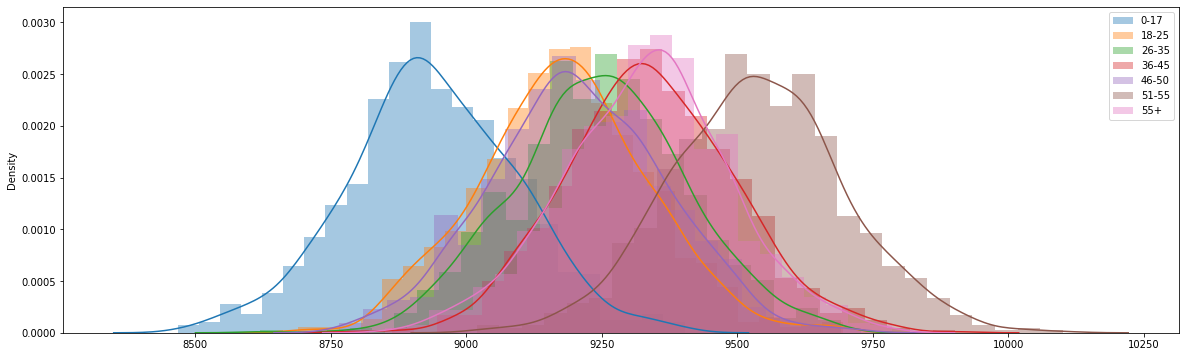

In [39]:
plt.figure(figsize = (20,6))


avgamt_age = df[['User_ID','Age','Purchase']].copy()

for i in (sorted(list(avgamt_age['Age'].unique()))):
  avgamt_single = avgamt_age[avgamt_age['Age']==i][['Purchase']]

  sample_size = 1000
  num_repetitions = 1000

  means = [avgamt_single.sample(sample_size).mean() for k in range (num_repetitions)]

  sns.distplot(means,label=i)
  #plt.axvline(np.percentile(means, 2.5), linestyle='-', color='orange',label="2.5%")
  #plt.axvline(np.percentile(means, 97.5), linestyle='-', color='red',label="97.5%")
  plt.legend()
plt.show()

In [40]:
print("Mean and 95% CI for average purchase amount per age bin - ")
df.groupby('Age')['Purchase'].apply(boot_mean_estimate)

Mean and 95% CI for average purchase amount per age bin - 


Age
0-17     (8936.1405405, [8835.354710000001, 9044.147425...
18-25     (9170.486596900002, [9071.9906575, 9268.962105])
26-35          (9256.4427059, [9158.1780325, 9356.862325])
36-45          (9332.0019179, [9230.3765725, 9431.649895])
46-50    (9206.526919200001, [9111.0805375, 9305.4025275])
51-55    (9535.495267500002, [9435.0531975, 9632.8254325])
55+         (9337.625177400001, [9239.29835, 9432.556025])
Name: Purchase, dtype: object

- With large sample size, sample means approach population means as per CLT.

- Age 0-17 purchase less on average 8.9k.
- Age 51-55 purchase most on an average 9.5k



# Insights

- There are 7 unique age groups and most of the purchase belongs to age 26-35 group.
- There are 3 unique citi categories with category B being the highest.
- 5 unique values for Stay_in_current_citi_years with 1 being the highest.
- 21 distinct occupations with 4 being highest.
- 20 unique product categories with 20 being highest.

- For purchase variable, the mean and median differ indicating outliers.
- Purchase min in 12 and max in 23k showing a range of values Mean is 9.2k and 75% values are less than 12k.

- 40% of the purchase done by aged 26-35.
- 75% of the purchase is done by males.
- 60% single and 40% customers are married.
- 35% customers staying in city from 1 year.
- 42% customers belong to city category B.

- Purchases done by males are much higher than females.
- Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.
- Purchases are highest from City category B.
- Single customer purchases are higher than married users.
- 26-31 age group purchase more.
- Most customers stay in curent city for 1 year.
- Category 1,5,8 are sold most.

- Most of the purchases lie between 5k to 12k across all groups.

- 95% CI dont overlap so we can confidently say that male purchase amount is higher than female purchase amount.

- Not much difference is seen between purchase amounts of married vs unmarried customers even when the sample size is hig. This means the customers spend same regardless of their marital status.

- Age 0-17 purchase less on average 8.9k.

- Age 51-55 purchase most on an average 9.5k

# Recommendations

* Product 1, 5 and 8 are most demanded so enough quantity and good quality should be kept in stock of these products.

* City B have more sales so, stock should be maintained there.

* Targetting people who are living in city for atleast a year for shopping by attractive offers.

* Men spend more money than women, So company should focus on retaining the male customers and getting more female customers. Giving additional offers for women can increase their spending on Black Friday.

* Customers in the age 51-55 spend more money than the others, So company should focus on giving high customer care to this age group to continue getting the sales.

* Highest frequency of purchase is between 5k and 10k, company can focus more on these mid range products to increase the sales.
